In [ ]:
# MIXED MM -> Latent Profile Analysis

In [ ]:
#!pip3 install pandas

In [ ]:
#!pip3 install seaborn

In [44]:
## Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, ParameterGrid
from stepmix.bootstrap import blrt_sweep
from stepmix.stepmix import StepMix
from stepmix.utils import get_mixed_descriptor

In [47]:
# Load data 

# MEASUREMENT MODEL

# CONTINUOUS + BINARY MM
cnt = pd.read_csv('../data/Xcnt.csv', index_col=0)

# Define MIXED descriptor for MM
# (unspecified variables are simply not included in mixed_data)
X_mixed, mixed_descriptor = get_mixed_descriptor(
    dataframe = cnt,
    continuous = ['rel_cnt', 'rel_clo'], # can also deal with continuous NaN!!
    binary_nan = ['tra_lca', 'cnf_lca', 'sup_lca', 'mon_lca']
)

In [48]:
X_mixed

,rel_cnt,rel_clo,tra_lca,cnf_lca,sup_lca,mon_lca
1,6,5,1.0,0,1,1
2,6,5,1.0,0,1,1
3,4,4,1.0,0,0,0
4,5,4,0.0,0,0,0
5,5,5,1.0,0,1,1
...,...,...,...,...,...,...
63668,5,4,0.0,1,0,0
63669,5,4,0.0,1,0,0
63670,5,4,0.0,1,1,1
63671,5,4,0.0,1,1,0


In [49]:
# Load data 

# STRUCTURAL MODEL
Z = pd.read_csv('../data/Z.csv', index_col = 0)

# The covariate model as an internal optimization procedure
# We can specify additional arguments such as the learning rate
# and the optimization method
opt_params = {
    'method': 'newton-raphson',  # Can also be "gradient",
    'intercept': True,
    'max_iter': 1,  # Number of opt. step each time we update the covariate model
}

In [50]:
# Set ups
k = 5  # number of classes
m = 3000 # maximum number iterations
r = 5 # number of times to estimate models (nrep > 1 automates search for global max)

# random seed
seed = 240792

In [51]:
# Define base model for MIXED w/o covariates (1-step)
mixed_base1 = StepMix(
    n_components = 5, 
    n_steps = 1,
    measurement = mixed_descriptor,   
    verbose = 1, 
    n_init = r,
    max_iter = m,
    random_state = seed)

mixed_base1.fit(X_mixed)

Fitting StepMix...


Initializations (n_init) : 100%|█████████████████| 5/5 [04:56<00:00, 59.22s/it, max_LL=3.39e+4, max_avg_LL=0.533]

MODEL REPORT
    Measurement model parameters
          model_name           continuous                            
          class_no                      0       1      2    3       4
          param       variable                                       
          covariances rel_clo      0.2090  0.0000  0.000  0.0  0.0000
                      rel_cnt      1.3976  1.3652  0.620  0.0  0.8990
          means       rel_clo      4.2973  3.0000  1.000  5.0  2.0000
                      rel_cnt      4.1235  3.1839  1.525  6.0  2.3567


          model_name     binary_nan                                
          class_no                0       1       2       3       4
          param variable                                           
          pis   cnf_lca      0.2509  0.2481  0.2578  0.2661  0.2273
                mon_lca      0.1458  0.0548  0.0085  0.3998  0.0227
                sup_lca      0.6373  0.3286  0.0384  0.9205  0.1188
                tra_lca      0.4392  0.3325  0.1558  0

StepMix(max_iter=3000,
        measurement={'binary_nan': {'model': 'binary_nan', 'n_columns': 4},
                     'continuous': {'model': 'continuous', 'n_columns': 2}},
        n_components=5, n_init=5, random_state=240792, verbose=1)

In [20]:
# Define base model for MIXED w/o covariates (2-step)
mixed_base2 = StepMix(
    n_components = 5, 
    n_steps = 2,
    measurement = mixed_descriptor,   
    verbose = 1, 
    n_init = r,
    max_iter = m,
    random_state = seed)

mixed_base2.fit(X_mixed)

Fitting StepMix...


Initializations (n_init) : 100%|███████████████████| 5/5 [00:16<00:00,  3.35s/it, max_LL=1.46e+5, max_avg_LL=2.3]

MODEL REPORT
    Measurement model parameters
          model_name           continuous                             
          class_no                      0       1       2    3       4
          param       variable                                        
          covariances rel_clo      0.0131  0.0000  0.0000  0.0  0.0000
                      rel_cnt      0.0559  0.0546  0.0248  0.0  0.0360
          means       rel_clo      0.8243  0.5000  0.0000  1.0  0.2500
                      rel_cnt      0.6247  0.4367  0.1050  1.0  0.2713


          model_name     binary_nan                                
          class_no                0       1       2       3       4
          param variable                                           
          pis   cnf_lca      0.2510  0.2480  0.2578  0.2661  0.2273
                mon_lca      0.1459  0.0548  0.0085  0.3998  0.0227
                sup_lca      0.6373  0.3285  0.0384  0.9205  0.1188
                tra_lca      0.4393  0.3324  0.

StepMix(max_iter=3000,
        measurement={'binary_nan': {'model': 'binary_nan', 'n_columns': 4},
                     'continuous': {'model': 'continuous', 'n_columns': 2}},
        n_components=5, n_init=5, n_steps=2, random_state=240792, verbose=1)

In [21]:
# Define base model for MIXED w/o covariates (3-step, ML)
mixed_base3ml = StepMix(
    n_components = 5, 
    n_steps = 3,
    correction = 'ML',
    measurement = mixed_descriptor,   
    verbose = 1, 
    n_init = r,
    max_iter = m,
    random_state = seed)

mixed_base3ml.fit(X_mixed)

Fitting StepMix...


Initializations (n_init) : 100%|███████████████████| 5/5 [00:17<00:00,  3.43s/it, max_LL=1.46e+5, max_avg_LL=2.3]

MODEL REPORT
    Measurement model parameters
          model_name           continuous                             
          class_no                      0       1       2    3       4
          param       variable                                        
          covariances rel_clo      0.0131  0.0000  0.0000  0.0  0.0000
                      rel_cnt      0.0559  0.0546  0.0248  0.0  0.0360
          means       rel_clo      0.8243  0.5000  0.0000  1.0  0.2500
                      rel_cnt      0.6247  0.4367  0.1050  1.0  0.2713


          model_name     binary_nan                                
          class_no                0       1       2       3       4
          param variable                                           
          pis   cnf_lca      0.2510  0.2480  0.2578  0.2661  0.2273
                mon_lca      0.1459  0.0548  0.0085  0.3998  0.0227
                sup_lca      0.6373  0.3285  0.0384  0.9205  0.1188
                tra_lca      0.4393  0.3324  0.

StepMix(correction='ML', max_iter=3000,
        measurement={'binary_nan': {'model': 'binary_nan', 'n_columns': 4},
                     'continuous': {'model': 'continuous', 'n_columns': 2}},
        n_components=5, n_init=5, n_steps=3, random_state=240792, verbose=1)

In [22]:
# COMPARE: MM with and without covariates (3-step)

# Define model for MIXED with covariates (3-step, ML)
mixed_cov3ml = StepMix(
    n_components = 5, 
    n_steps = 3,
    correction = 'ML',
    measurement = mixed_descriptor,   
    structural = 'covariate', 
    structural_params = opt_params,
    verbose = 1, 
    n_init = r,
    max_iter = m,
    random_state = seed)

mixed_cov3ml.fit(X_mixed, Z)

Fitting StepMix...


Initializations (n_init) : 100%|███████████████████| 5/5 [00:16<00:00,  3.20s/it, max_LL=1.46e+5, max_avg_LL=2.3]


Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [00:02<00:00,  1.92it/s, max_LL=-8.77e+4, max_avg_LL=-1.38]

MODEL REPORT
    Measurement model parameters
          model_name           continuous                             
          class_no                      0       1       2    3       4
          param       variable                                        
          covariances rel_clo      0.0131  0.0000  0.0000  0.0  0.0000
                      rel_cnt      0.0559  0.0546  0.0248  0.0  0.0360
          means       rel_clo      0.8243  0.5000  0.0000  1.0  0.2500
                      rel_cnt      0.6247  0.4367  0.1050  1.0  0.2713


          model_name     binary_nan                                
          class_no                0       1       2       3       4
          param variable                                           
          pis   cnf_lca      0.2510  0.2480  0.2578  0.2661  0.2273
                mon_lca      0.1459  0.0548  0.0085  0.3998  0.0227
                sup_lca      0.6373  0.3285  0.0384  0.9205  0.1188
                tra_lca      0.4393  0.3324  0.

StepMix(correction='ML', max_iter=3000,
        measurement={'binary_nan': {'model': 'binary_nan', 'n_columns': 4},
                     'continuous': {'model': 'continuous', 'n_columns': 2}},
        n_components=5, n_init=5, n_steps=3, random_state=240792,
        structural='covariate',
        structural_params={'intercept': True, 'max_iter': 1,
                           'method': 'newton-raphson'},
        verbose=1)

In [57]:
# HOW MANY CLASSES? -- MIXED 

# Loop over number of classes (3-step ML)
result_mixed_numcl = dict(number=[], log_likelihood=[], caic=[], abic=[], relative_entropy=[])

for n in [1, 2, 3, 4, 5, 6, 7, 8]:
    # Create a new StepMix instance for each n
    mixed_base3ml = StepMix(
        n_components=n, 
        n_steps=3,
        correction='ML',
        measurement=mixed_descriptor,   
        verbose=1, 
        n_init=r,
        max_iter=m,
        random_state=seed
    )
    
    # Fit the model
    mixed_base3ml.fit(X_mixed)
    
    # Get log-likelihood
    ll = mixed_base3ml.score(X_mixed)

    # Get cAIC
    caic = mixed_base3ml.caic(X_mixed)

    # Get sBIC
    abic = mixed_base3ml.sabic(X_mixed)

    # Get relative entropy
    rel_entr = mixed_base3ml.relative_entropy(X_mixed)
    
    # Store results
    result_mixed_numcl['number'].append(n)
    result_mixed_numcl['log_likelihood'].append(ll)
    result_mixed_numcl['caic'].append(caic)
    result_mixed_numcl['abic'].append(abic)
    result_mixed_numcl['relative_entropy'].append(rel_entr)


Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [00:00<00:00, 33.37it/s, max_LL=-3.64e+5, max_avg_LL=-5.72]

MODEL REPORT
    Measurement model parameters
          model_name           continuous
          class_no                      0
          param       variable           
          covariances rel_clo      2.0006
                      rel_cnt      2.7220
          means       rel_clo      2.6858
                      rel_cnt      2.9979


          model_name     binary_nan
          class_no                0
          param variable           
          pis   cnf_lca      0.2484
                mon_lca      0.0856
                sup_lca      0.3219
                tra_lca      0.3293


    Class weights
        Class 1 : 1.00
    Fit for 1 latent classes
    Estimation method             : 3-step
    Correction method             : ML
    Assignment method             : modal
    Number of observations        : 63672
    Number of latent classes      : 1
    Number of estimated parameters: 8
    Log-likelihood (LL)           : -364237.8279
    -2LL                          : 728475.

Fitting StepMix...


Initializations (n_init) : 100%|█████████████████| 5/5 [00:08<00:00,  1.63s/it, max_LL=-3.12e+5, max_avg_LL=-4.9]


MODEL REPORT
    Measurement model parameters
          model_name           continuous        
          class_no                      0       1
          param       variable                   
          covariances rel_clo      0.6093  0.8657
                      rel_cnt      0.6193  1.6022
          means       rel_clo      1.7147  4.0067
                      rel_cnt      1.8844  4.5124


          model_name     binary_nan        
          class_no                0       1
          param variable                   
          pis   cnf_lca      0.2165  0.2917
                mon_lca      0.0054  0.1948
                sup_lca      0.0596  0.6786
                tra_lca      0.1713  0.5089


    Class weights
        Class 1 : 0.58
        Class 2 : 0.42
    Fit for 2 latent classes
    Estimation method             : 3-step
    Correction method             : ML
    Assignment method             : modal
    Number of observations        : 63672
    Number of latent classes     

Initializations (n_init) : 100%|████████████████| 5/5 [00:17<00:00,  3.53s/it, max_LL=-2.96e+5, max_avg_LL=-4.64]


MODEL REPORT
    Measurement model parameters
          model_name           continuous                
          class_no                      0       1       2
          param       variable                           
          covariances rel_clo      0.2369  0.1916  0.9204
                      rel_cnt      0.3482  0.1755  1.1990
          means       rel_clo      1.3477  4.7565  3.1786
                      rel_cnt      1.5686  5.7753  3.3384


          model_name     binary_nan                
          class_no                0       1       2
          param variable                           
          pis   cnf_lca      0.2236  0.3122  0.2492
                mon_lca      0.0028  0.3716  0.0643
                sup_lca      0.0247  0.9127  0.3883
                tra_lca      0.1324  0.6513  0.3581


    Class weights
        Class 1 : 0.40
        Class 2 : 0.15
        Class 3 : 0.45
    Fit for 3 latent classes
    Estimation method             : 3-step
    Correction method

Initializations (n_init) : 100%|██████████████████| 5/5 [06:21<00:00, 76.35s/it, max_LL=-1.4e+5, max_avg_LL=-2.2]


MODEL REPORT
    Measurement model parameters
          model_name           continuous                        
          class_no                      0       1       2       3
          param       variable                                   
          covariances rel_clo      0.2207  0.6912  0.7592  0.0000
                      rel_cnt      0.4744  0.0000  0.8876  0.4821
          means       rel_clo      2.3127  4.5004  3.7618  1.0000
                      rel_cnt      2.2296  6.0000  3.7584  1.4907


          model_name     binary_nan                        
          class_no                0       1       2       3
          param variable                                   
          pis   cnf_lca      0.1815  0.3561  0.2582  0.2549
                mon_lca      0.0050  0.3559  0.1135  0.0067
                sup_lca      0.0884  0.8418  0.5720  0.0359
                tra_lca      0.1921  0.6752  0.4150  0.1493


    Class weights
        Class 1 : 0.29
        Class 2 : 0.13
    

Initializations (n_init) : 100%|█████████████████| 5/5 [07:24<00:00, 88.81s/it, max_LL=3.39e+4, max_avg_LL=0.533]


MODEL REPORT
    Measurement model parameters
          model_name           continuous                            
          class_no                      0       1      2    3       4
          param       variable                                       
          covariances rel_clo      0.2090  0.0000  0.000  0.0  0.0000
                      rel_cnt      1.3976  1.3652  0.620  0.0  0.8990
          means       rel_clo      4.2973  3.0000  1.000  5.0  2.0000
                      rel_cnt      4.1235  3.1839  1.525  6.0  2.3567


          model_name     binary_nan                                
          class_no                0       1       2       3       4
          param variable                                           
          pis   cnf_lca      0.2509  0.2481  0.2578  0.2661  0.2273
                mon_lca      0.1458  0.0548  0.0085  0.3998  0.0227
                sup_lca      0.6373  0.3286  0.0384  0.9205  0.1188
                tra_lca      0.4392  0.3325  0.1558  0

Initializations (n_init) : 100%|██████████████████| 5/5 [02:32<00:00, 30.43s/it, max_LL=1.18e+5, max_avg_LL=1.85]


MODEL REPORT
    Measurement model parameters
          model_name           continuous                                    
          class_no                      0       1       2       3    4      5
          param       variable                                               
          covariances rel_clo      0.0000  0.0000  0.0000  0.0000  0.0  0.000
                      rel_cnt      1.3654  0.8991  1.5970  0.9255  0.0  0.620
          means       rel_clo      3.0000  2.0000  4.0000  5.0000  5.0  1.000
                      rel_cnt      3.1840  2.3567  4.1108  4.1535  6.0  1.525


          model_name     binary_nan                                        
          class_no                0       1       2       3       4       5
          param variable                                                   
          pis   cnf_lca      0.2481  0.2273  0.2709  0.2037  0.2661  0.2578
                mon_lca      0.0549  0.0227  0.1333  0.1753  0.3998  0.0085
                sup_lca   

Initializations (n_init) : 100%|███████████████████| 5/5 [07:03<00:00, 84.75s/it, max_LL=1.3e+5, max_avg_LL=2.05]


MODEL REPORT
    Measurement model parameters
          model_name           continuous                                         
          class_no                      0    1       2       3      4       5    6
          param       variable                                                    
          covariances rel_clo      0.0000  0.0  0.0000  0.0000  0.000  0.0000  0.0
                      rel_cnt      0.9255  0.0  0.9243  1.3654  0.620  0.8991  0.0
          means       rel_clo      5.0000  4.0  4.0000  3.0000  1.000  2.0000  5.0
                      rel_cnt      4.1535  6.0  3.6606  3.1840  1.525  2.3567  6.0


          model_name     binary_nan                                                
          class_no                0       1       2       3       4       5       6
          param variable                                                           
          pis   cnf_lca      0.2037  0.4798  0.2211  0.2481  0.2578  0.2273  0.2661
                mon_lca      0.1753

Initializations (n_init) : 100%|██████████████████| 5/5 [07:50<00:00, 94.14s/it, max_LL=1.33e+5, max_avg_LL=2.09]


MODEL REPORT
    Measurement model parameters
          model_name           continuous                                                  
          class_no                      0       1    2       3       4       5       6    7
          param       variable                                                             
          covariances rel_clo      0.0000  0.0000  0.0  0.0000  0.0000  0.0000  0.0000  0.0
                      rel_cnt      1.3654  1.5970  0.0  0.8991  0.6090  0.2212  1.2789  0.0
          means       rel_clo      3.0000  4.0000  5.0  2.0000  5.0000  1.0000  1.0000  5.0
                      rel_cnt      3.1840  4.1108  5.0  2.3567  3.4549  1.3186  2.6802  6.0


          model_name     binary_nan                                                        
          class_no                0       1       2       3       4       5       6       7
          param variable                                                                   
          pis   cnf_lca      0.2

In [58]:
# Report results
result_mixed_numcl = pd.DataFrame(result_mixed_numcl)
result_mixed_numcl

,number,log_likelihood,caic,abic,relative_entropy
0,1,-5.720534,728572.147736,728627.215558,NaN
1,2,-4.896092,623692.931683,623809.950805,0.870794
2,3,-4.643768,591669.650643,591848.621065,0.878916
3,4,-2.195883,280054.701482,280295.623203,0.931568
4,5,0.532921,-67333.576259,-67030.703237,0.999919
5,6,1.847982,-234690.156739,-234325.332417,0.999940
6,7,2.046694,-259886.331453,-259459.555831,0.999912
7,8,2.089771,-265263.397282,-264774.670361,0.973942


Text(0.5, 1.0, 'Log-likelihood across classes\nMixed model, continuous vars unstandardized')

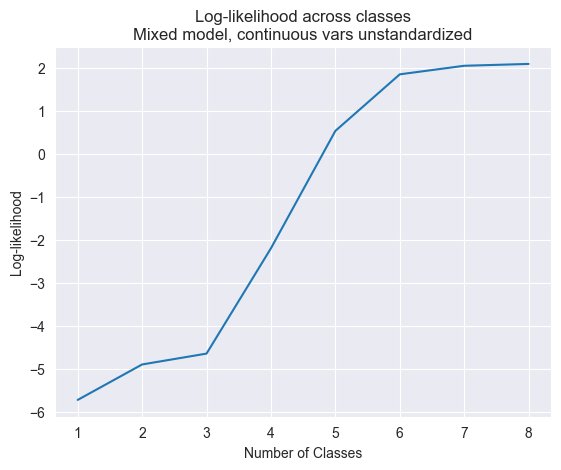

In [64]:
# Higher is better
sns.set_style("darkgrid")
sns.lineplot(data = result_mixed_numcl, 
             x = 'number', 
             y = 'log_likelihood')

# Add labels and title
plt.xlabel('Number of Classes')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood across classes\n' 'Mixed model, continuous vars unstandardized')

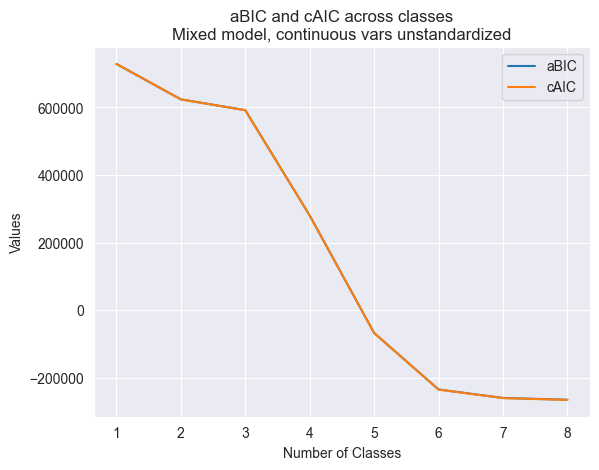

In [65]:
# Higher is better
sns.set_style("darkgrid")
# Create the line plot for ABIC
sns.lineplot(data=result_mixed_numcl, x='number', y='abic', label='aBIC')

# Add another line for CAIC
sns.lineplot(data=result_mixed_numcl, x='number', y='caic', label='cAIC')

# Add labels and title
plt.xlabel('Number of Classes')
plt.ylabel('Values')
plt.title('aBIC and cAIC across classes\n' 'Mixed model, continuous vars unstandardized')
plt.legend()  # Show the legend to differentiate the lines

# Show the plot
plt.show()

In [ ]:
# VALIDATE NUMBER OF COMPONENTS WITH THE BLRT

# Parametric Bootstrapped Likelihood Ratio Test for testing the number of components
# compare a model with  𝑘  components to a model with  𝑘+1  components
# low p-value: k-component model is unlikely model of data compared to k+1 component model
binary_base3ml = StepMix(
    n_components = 5, 
    n_steps = 3,
    correction = 'ML',
    measurement = mixed_descriptor,   
    verbose = 0, 
    n_init = r,
    max_iter = m,
    random_state = seed)

# Run BLRT sweep from 5 class to 6 classes
# Expect some convergence warnings
p_val_binary = blrt_sweep(
    binary_base3ml, X_bin, 
    low = 4, 
    high = 6, 
    n_repetitions = 10) # recommended: at least n = 100
p_val_binary

In [73]:
# PARAMETERS

mixed_8_3ml = StepMix(
        n_components=8, 
        n_steps=3,
        correction='ML',
        measurement=mixed_descriptor,   
        verbose=1, 
        n_init=r,
        max_iter=m,
        random_state=seed
    )
mixed_8_3ml.fit(X_mixed)

Fitting StepMix...


Initializations (n_init) : 100%|██████████████████| 5/5 [07:44<00:00, 92.85s/it, max_LL=1.33e+5, max_avg_LL=2.09]

MODEL REPORT
    Measurement model parameters
          model_name           continuous                                                  
          class_no                      0       1    2       3       4       5       6    7
          param       variable                                                             
          covariances rel_clo      0.0000  0.0000  0.0  0.0000  0.0000  0.0000  0.0000  0.0
                      rel_cnt      1.3654  1.5970  0.0  0.8991  0.6090  0.2212  1.2789  0.0
          means       rel_clo      3.0000  4.0000  5.0  2.0000  5.0000  1.0000  1.0000  5.0
                      rel_cnt      3.1840  4.1108  5.0  2.3567  3.4549  1.3186  2.6802  6.0


          model_name     binary_nan                                                        
          class_no                0       1       2       3       4       5       6       7
          param variable                                                                   
          pis   cnf_lca      0.2

StepMix(correction='ML', max_iter=3000,
        measurement={'binary_nan': {'model': 'binary_nan', 'n_columns': 4},
                     'continuous': {'model': 'continuous', 'n_columns': 2}},
        n_components=8, n_init=5, n_steps=3, random_state=240792, verbose=1)

In [81]:
# Measurement parameters
mm = mixed_8_3ml.get_mm_df()

mm.round(2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:1224: FutureWarning: The provided callable <function mean at 0x1047354e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


class_no                            0     1     2     3     4     5     6  \
model_name param       variable                                             
binary_nan pis         cnf_lca   0.25  0.27  0.23  0.23  0.18  0.24  0.36   
                       mon_lca   0.05  0.13  0.24  0.02  0.13  0.00  0.05   
                       sup_lca   0.33  0.59  0.83  0.12  0.67  0.02  0.15   
                       tra_lca   0.33  0.44  0.54  0.24  0.37  0.10  0.41   
continuous covariances rel_clo   0.00  0.00  0.00  0.00  0.00  0.00  0.00   
                       rel_cnt   1.37  1.60  0.00  0.90  0.61  0.22  1.28   
           means       rel_clo   3.00  4.00  5.00  2.00  5.00  1.00  1.00   
                       rel_cnt   3.18  4.11  5.00  2.36  3.45  1.32  2.68   

class_no                            7  
model_name param       variable        
binary_nan pis         cnf_lca   0.27  
                       mon_lca   0.40  
                       sup_lca   0.92  
                       tra_lca   0.66  
continuous covariances rel_clo   0.00  
                       rel_cnt   0.00  
           means       rel_clo   5.00  
                       rel_cnt   6.00

In [79]:
mm.keys()

Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64', name='class_no')

In [ ]:
# Structural parameters
sm = mixed_8_3ml.get_sm_df()

sm.round(2)

In [75]:
# Class weights
cw = mixed_8_3ml.get_cw_df()

cw.round(2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:613: PerformanceWarning: indexing past lexsort depth may impact performance.
  df = self.get_parameters_df(x_names, y_names).loc[
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:1234: FutureWarning: The provided callable <function mean at 0x1047354e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


class_no,0,1,2,3,4,5,6,7
param,,,,,,,,
class_weights,0.19,0.15,0.03,0.22,0.04,0.23,0.04,0.09


<Axes: xlabel='class_no', ylabel='model_name-param-variable'>

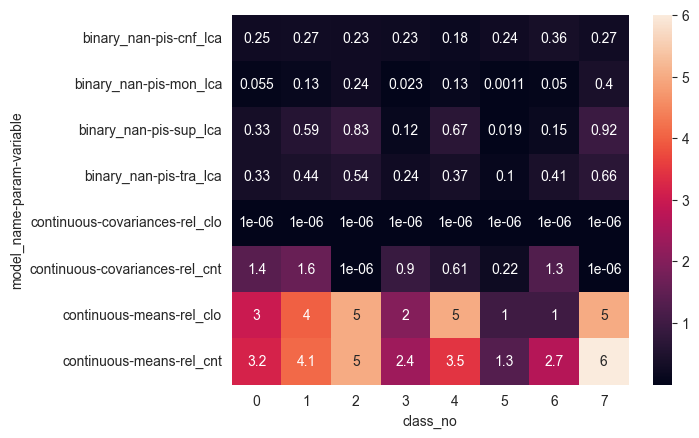

In [76]:
# Measurement parameters (heatmap)
sns.heatmap(mm, annot=True)